In [27]:
'''
Herein, clustering is performed to find characteristics of the users
'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [28]:
df = pd. read_csv('datasets/online_shoppers_intention.csv')

# Task 1. Data preparation

In [29]:
# search missing data in a dataset
MissingData = df.isnull().sum()
print(MissingData.sort_values(ascending = False))

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
Weekend                     0
Revenue                     0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
PageValues                  0
dtype: int64


In [30]:
#drop missing data for the analysis
df = df.dropna(subset = ['Administrative'])

In [32]:
#replace negative value tp 0
df['Administrative_Duration'] = df['Administrative_Duration'].replace(-1, 0)
df['Informational_Duration'] = df['Informational_Duration'].replace(-1, 0)
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].replace(-1, 0)

In [33]:
print(df['Informational_Duration'].value_counts())

0.000000       9912
9.000000         33
7.000000         26
6.000000         26
10.000000        26
13.000000        23
12.000000        23
8.000000         22
16.000000        22
11.000000        21
17.000000        18
15.000000        18
5.000000         18
23.000000        17
4.000000         17
14.000000        17
18.000000        17
3.000000         16
20.000000        14
21.000000        14
27.000000        12
19.000000        12
2.000000         11
56.000000        10
31.000000        10
39.000000        10
33.000000         9
34.000000         9
41.000000         9
32.000000         9
               ... 
597.583333        1
122.500000        1
18.466667         1
152.500000        1
105.666667        1
123.000000        1
256.066667        1
466.400000        1
704.750000        1
210.666667        1
162.500000        1
1373.750000       1
314.000000        1
1150.000000       1
139.000000        1
102.300000        1
204.400000        1
364.916667        1
24.700000         1


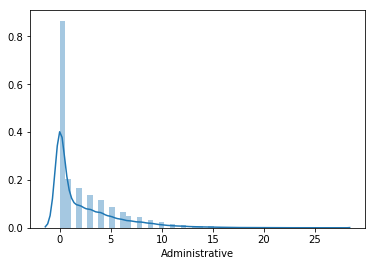

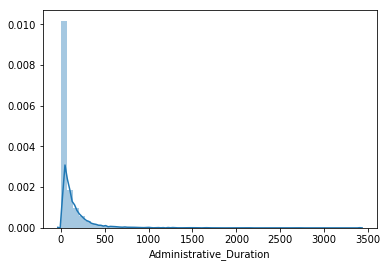

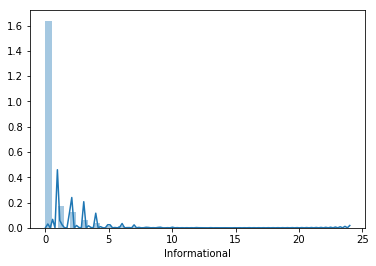

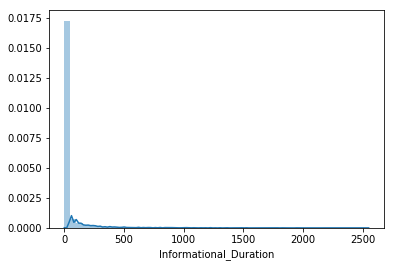

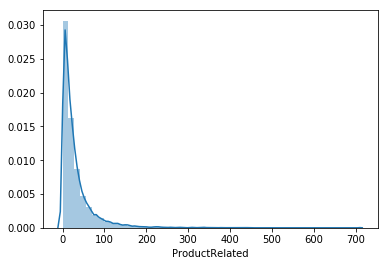

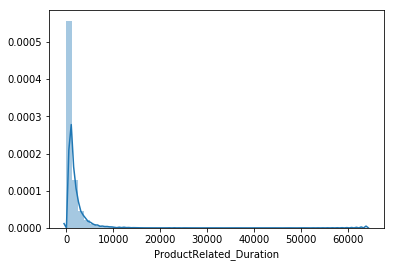

In [34]:
# Distribution of Administrative
regdens_dist = sns.distplot(df['Administrative'].dropna())
plt.show()

# Distribution of Administrative_Duration
medhhinc_dist = sns.distplot(df['Administrative_Duration'].dropna())
plt.show()

# Distribution of Informational
meanhhsz_dist = sns.distplot(df['Informational'].dropna())
plt.show()

# Distribution of Informational_Duration
meanhhsz_dist = sns.distplot(df['Informational_Duration'].dropna())
plt.show()

# Distribution of 'ProductRelated
meanhhsz_dist = sns.distplot(df['ProductRelated'].dropna())
plt.show()

# Distribution of ProductRelated_Duration
meanhhsz_dist = sns.distplot(df['ProductRelated_Duration'].dropna())
plt.show()

# Task 2. Clustering with non-scaled data

In [39]:
'''
First clustering with non scaled dataset
'''
df2 = df[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']]

# convert df2 to matrix
X = df2.as_matrix()

# scaling
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

C:\Users\kmw41\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


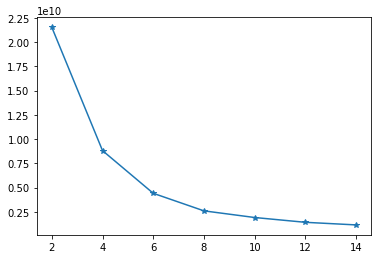

In [42]:
#find optimal number of clusters
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

    # plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

C:\Users\kmw41\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Cluster membership
1    7740
0    2001
3    1221
4     696
6     295
7     213
2     138
5      12
Name: Cluster_ID, dtype: int64


C:\Users\kmw41\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kmw41\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


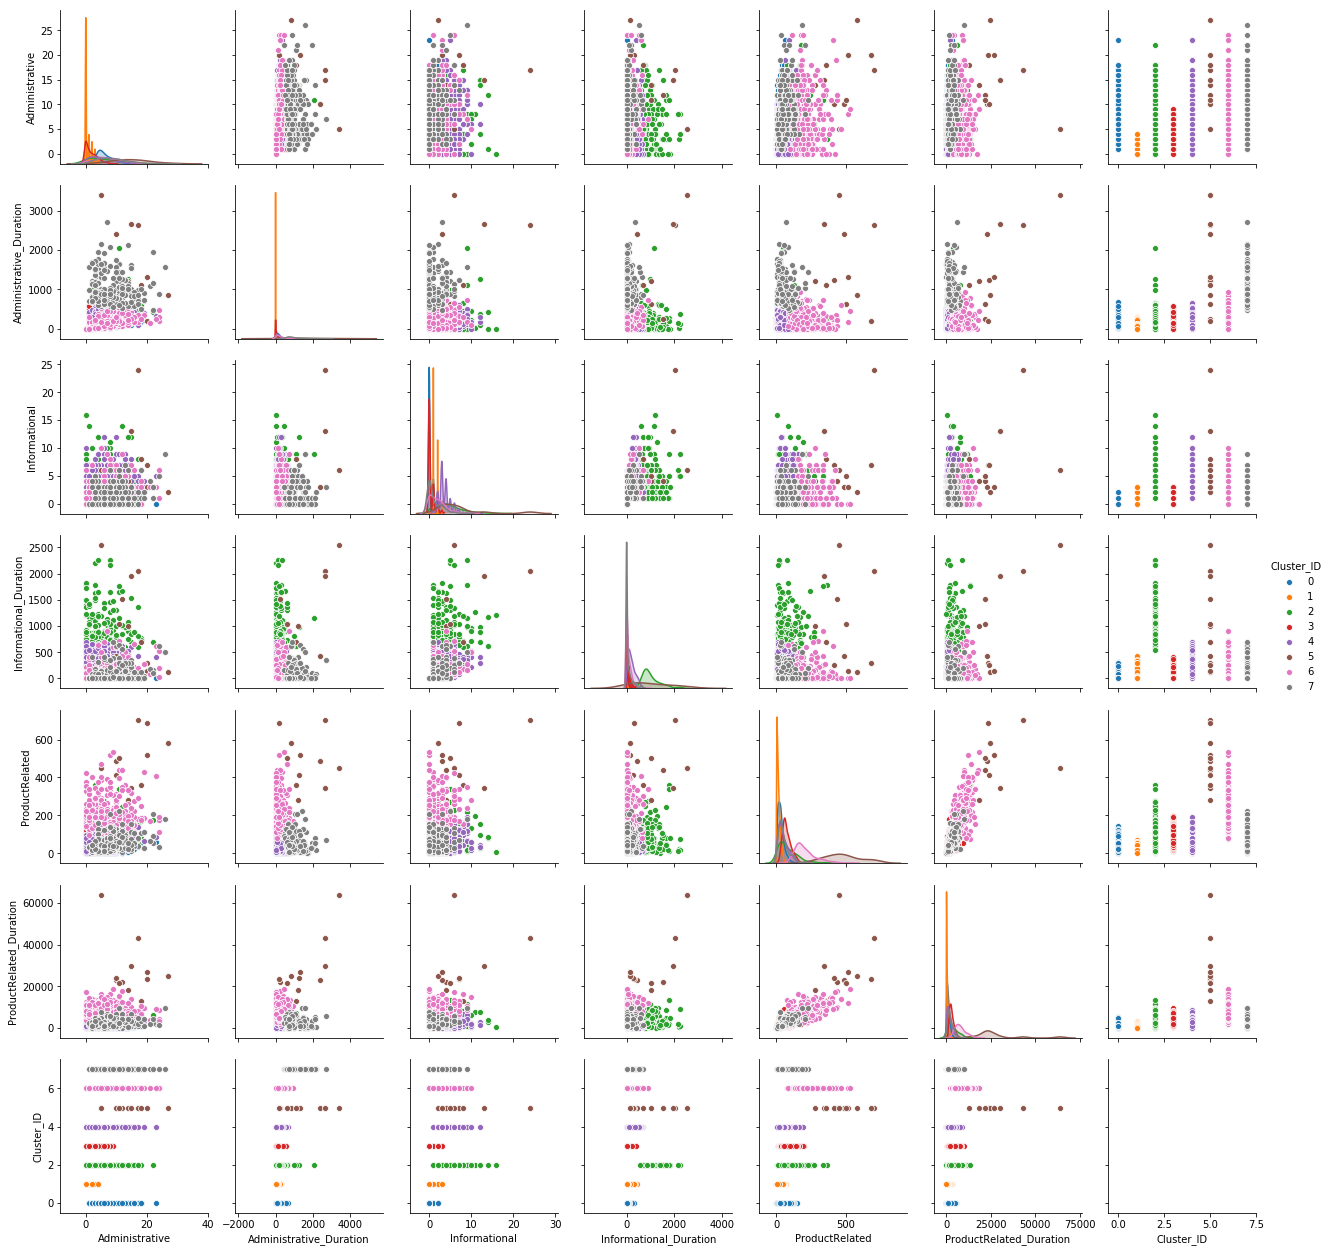

In [47]:
model = KMeans(n_clusters=8, random_state=rs).fit(X)

# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df2['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

# Task 2. Clustering with scaled data

In [49]:
'''
First clustering with non scaled dataset
'''
df3 = df[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']]

# convert df2 to matrix
X = df3.as_matrix()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\kmw41\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


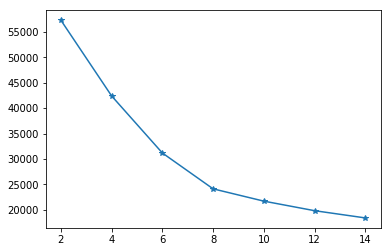

In [50]:
#find optimal number of clusters
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

    # plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

In [53]:
'''
Build a fist cluster model with scaled dataset
'''
from sklearn.cluster import KMeans

# random state, we will use 42 instead of 10 for a change
rs = 42

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=8, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 24133.038594607297
Centroid locations:
[-0.15874893 -0.19550999 -0.04728299 -0.1243659   0.98182635  0.97266261
  1.06900107]
[1.94330133 5.08609811 0.52707711 0.24791583 0.4752285  0.61904987
 3.8170322 ]
[1.6968946  0.72614975 1.11067252 0.4525886  3.97837456 3.51757942
 3.13002442]
[ 1.18929295  0.6253781  -0.09693385 -0.15361211  0.01765266 -0.0460147
 -0.99202228]
[1.09949908 0.68929709 3.07643011 7.09286222 1.16535223 1.31320795
 0.38199328]
[-0.50766887 -0.36277001 -0.31782904 -0.22051697 -0.39421785 -0.36854229
 -0.3050145 ]
[ 3.79184876  7.97997745  5.24352876  6.88143504 10.08093739 13.91108613
  2.44301663]
[0.90757784 0.44071864 2.56366154 1.31942252 0.37425169 0.34378218
 1.75600885]


C:\Users\kmw41\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Cluster membership
5    7740
3    2001
0    1221
7     696
2     295
1     213
4     138
6      12
Name: Cluster_ID, dtype: int64


C:\Users\kmw41\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kmw41\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


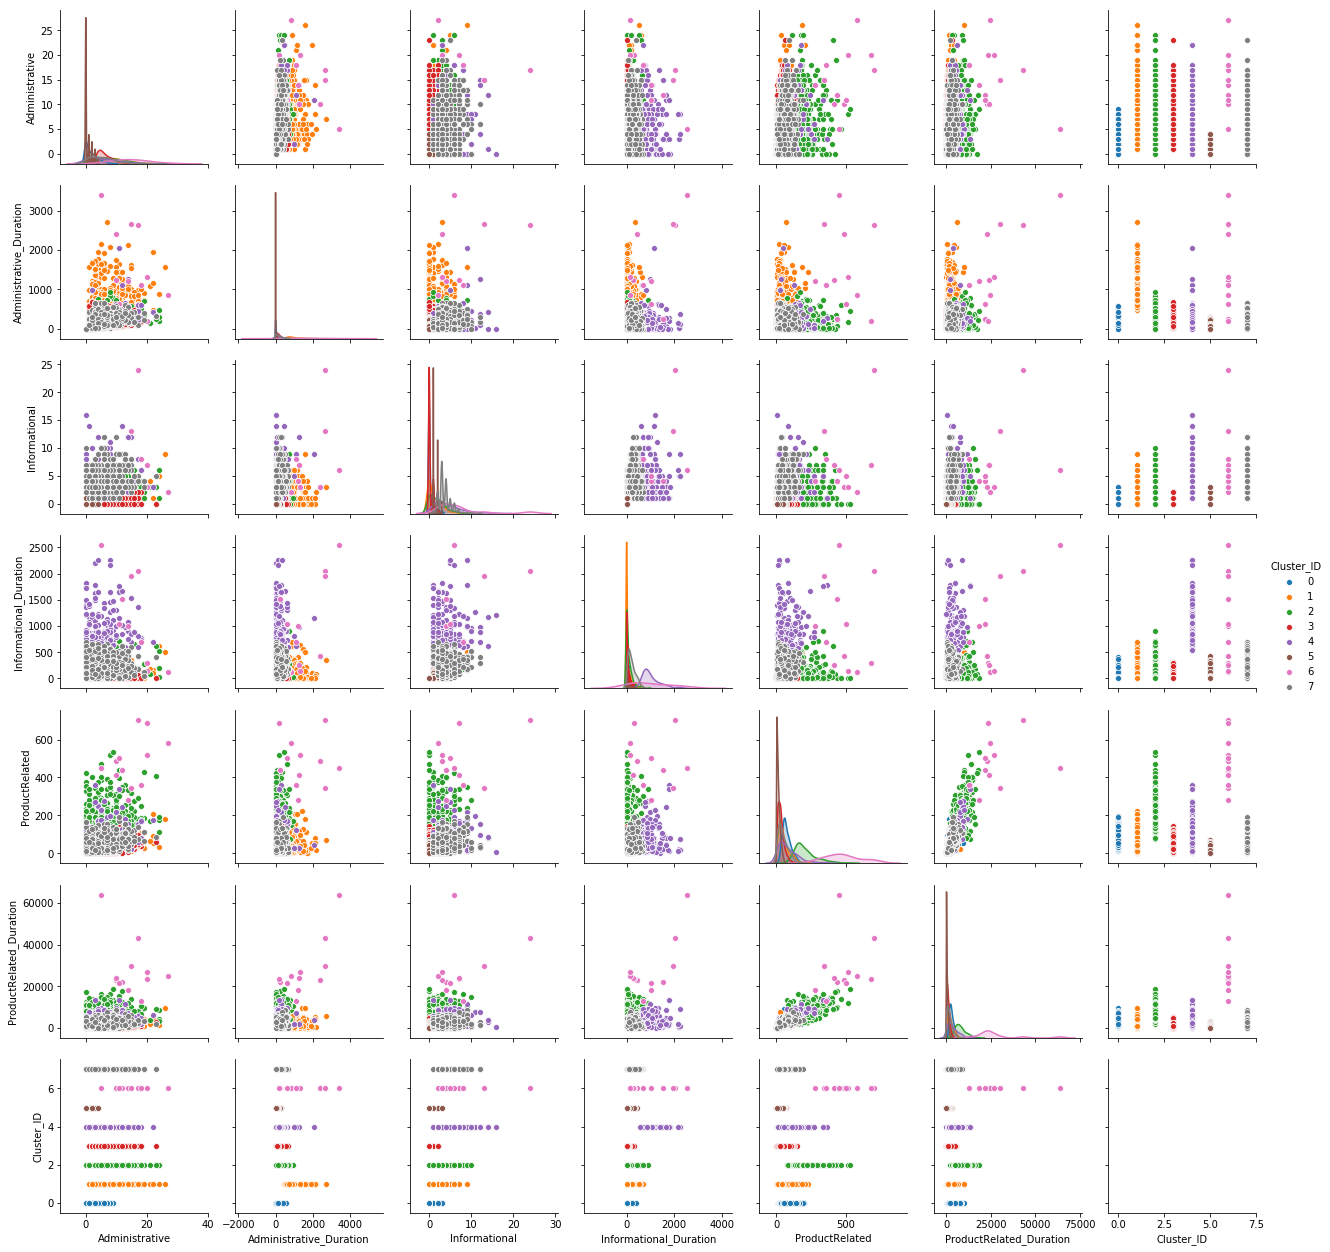

In [54]:
# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df3['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df3['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df3, hue='Cluster_ID')
plt.show()

# Task 3. Clustering with non-scaled data

In [126]:
'''
First clustering with non scaled dataset
'''
df4 = df[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','Region','Month','Weekend']]

Month_map = {'Feb':2, 'Mar': 3,'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df4['Month'] = df['Month'].map(Month_map)
df4.Weekend = df4.Weekend.astype('uint8')

# convert df2 to matrix
X = df4.as_matrix()

# scaling
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

C:\Users\kmw41\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\kmw41\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\kmw41\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [119]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 9 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
Region                     12316 non-null int64
Month                      12316 non-null int64
Weekend                    12316 non-null uint8
dtypes: float64(6), int64(2), uint8(1)
memory usage: 1.2 MB


In [120]:
df4.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Region,Month,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,1,2,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,1,2,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,9,2,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,2,2,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,1,2,1


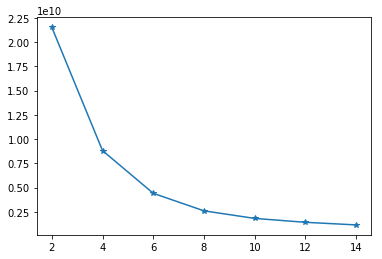

In [121]:
#find optimal number of clusters
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

    # plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

In [ ]:
# Kprototypes should be used instead of Kmeans to include both numeric and categorical variables in clustering
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
test=KPrototypes(n_clusters=3, init='Huang') # n_cluster is the parameter to set the number of clusters.
y=test.fit_predict(X, categorical=[6,7,8]) # Here categorical should be set with the indices of categorical variables. In this dataset, workclass is the only categorical variable. Note: Index starts with 0.  
df4['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df['Cluster_ID'].value_counts())

C:\Users\kmw41\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kmw41\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


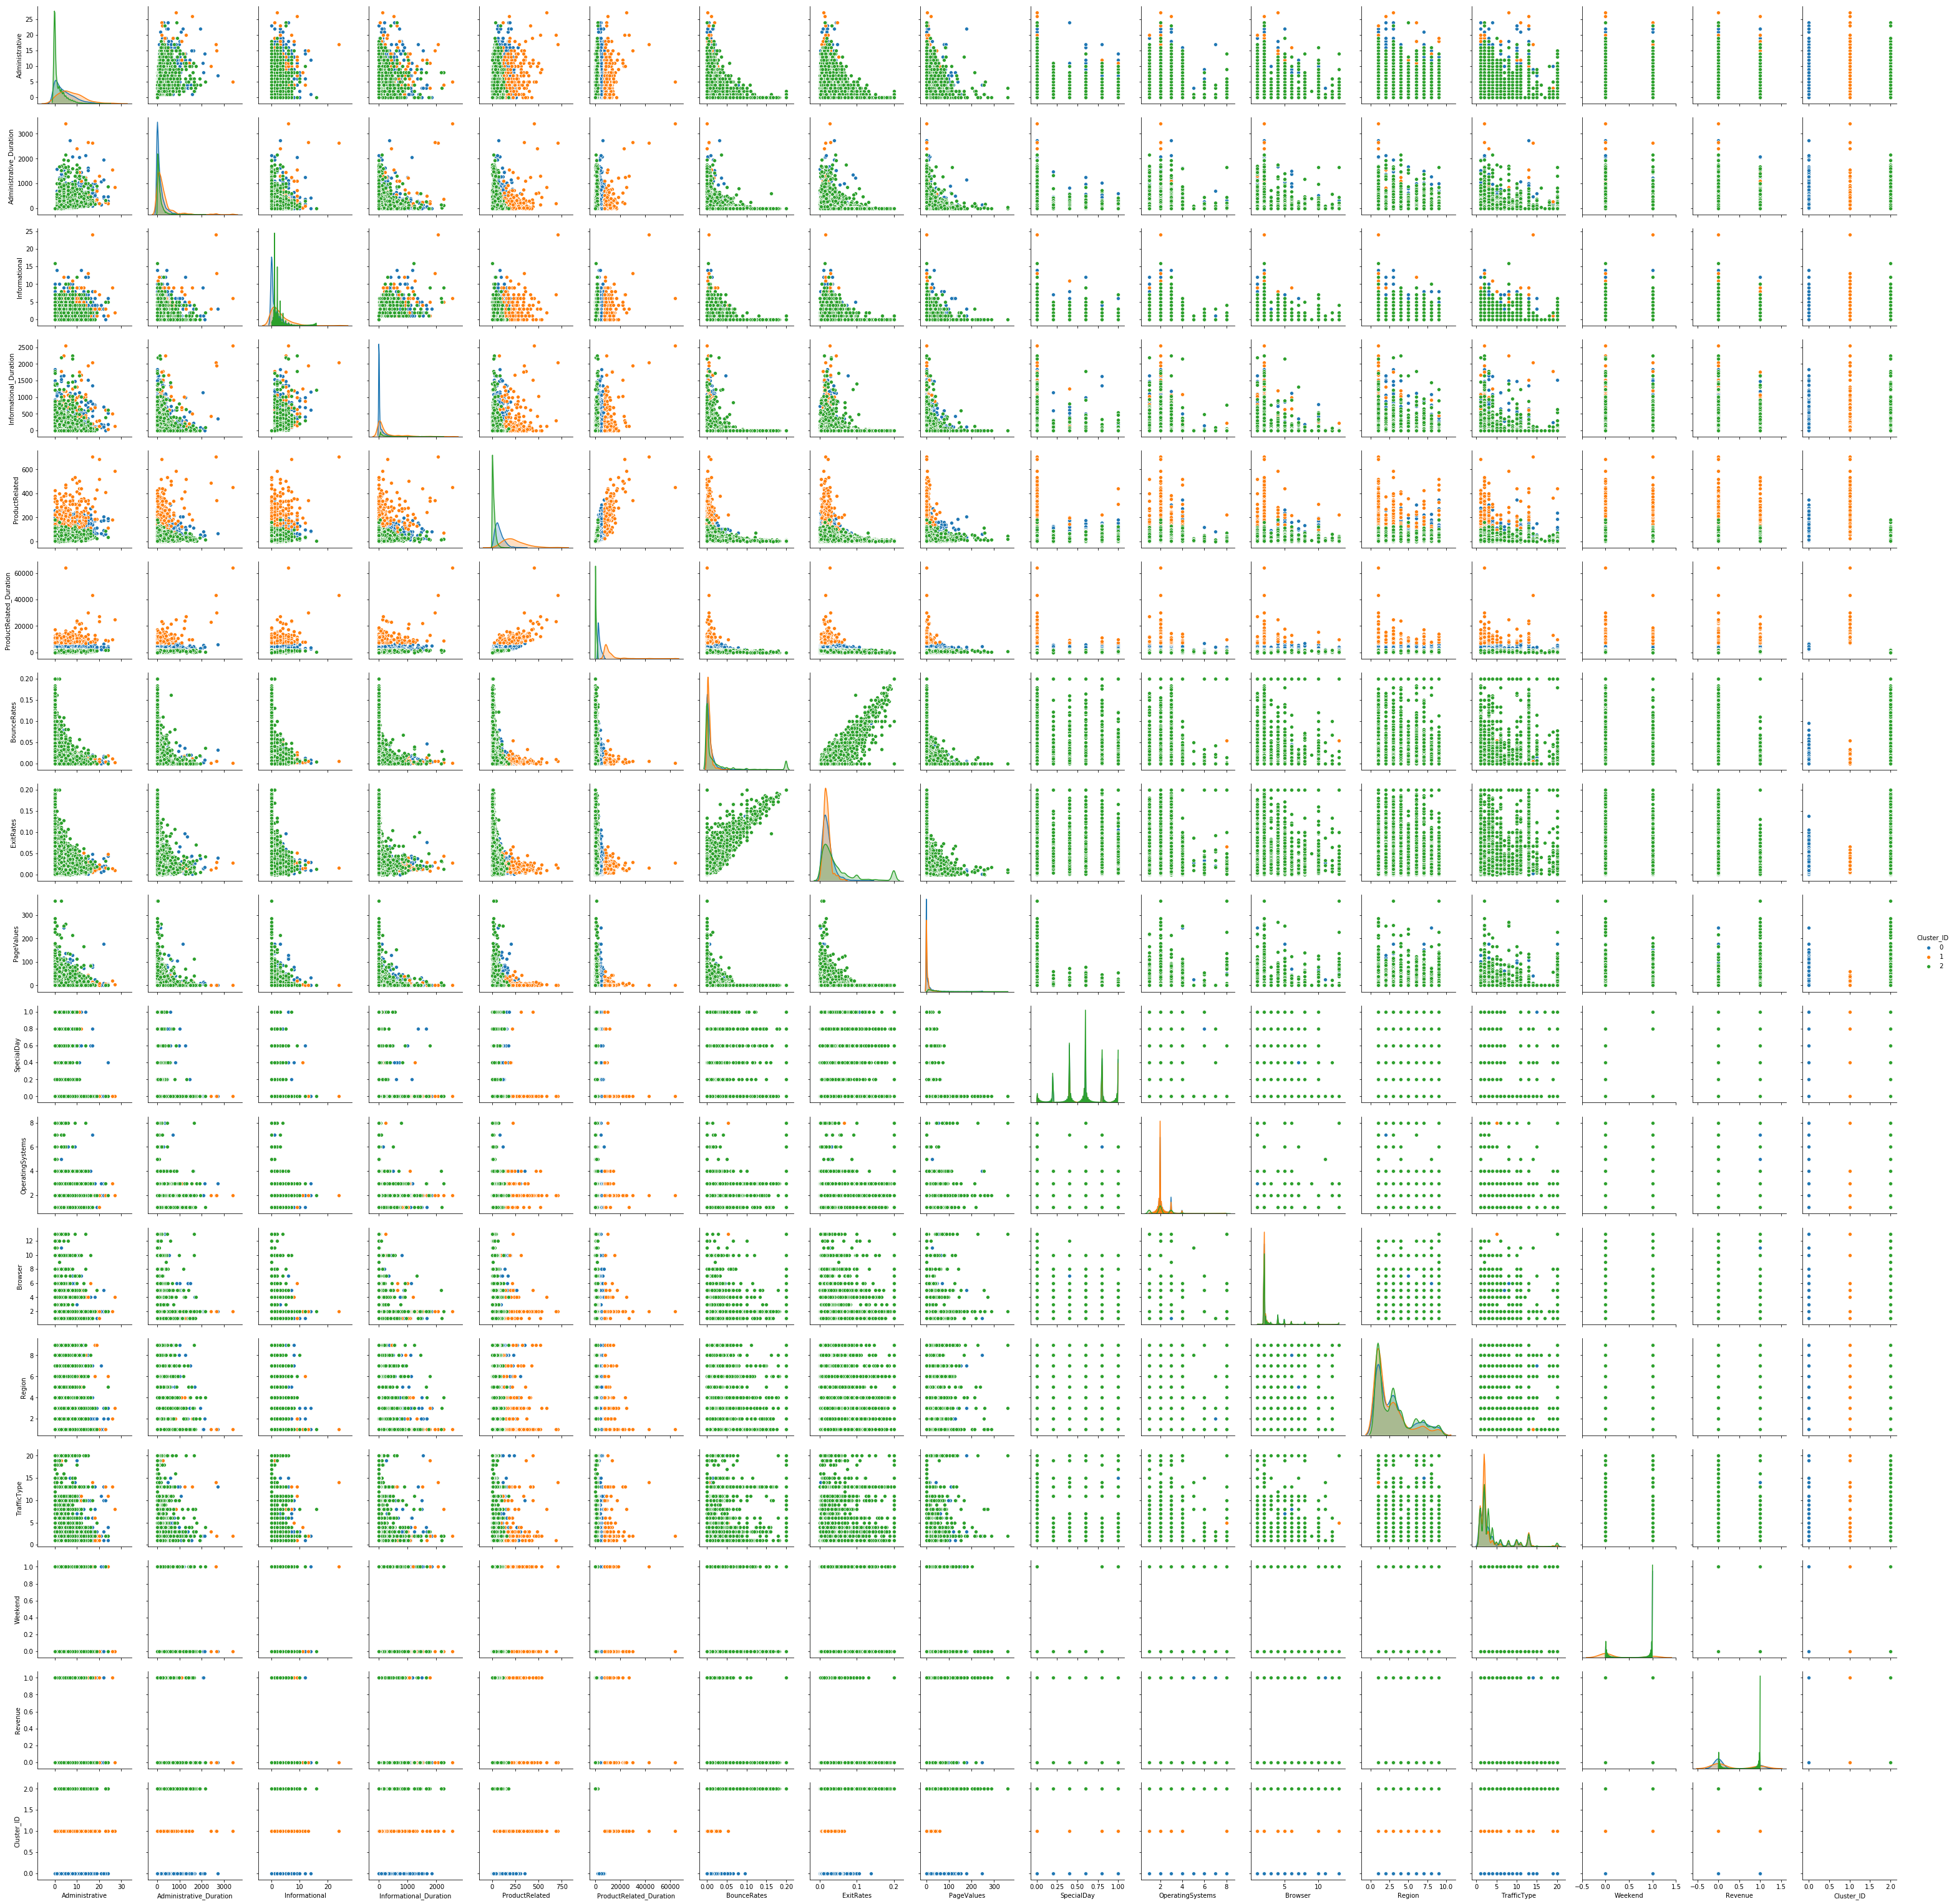

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df, hue='Cluster_ID')
plt.show()

# Task 3. Clustering with scaled data

In [ ]:
'''
First clustering with non scaled dataset
'''
df4 = df[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','Region','Month','Weekend']]

Month_map = {'Feb':2, 'Mar': 3,'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df4['Month'] = df['Month'].map(Month_map)
df4.Weekend = df4.Weekend.astype('uint8')

# convert df2 to matrix
X = df4.as_matrix()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#find optimal number of clusters
# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

    # plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

In [ ]:
# Kprototypes should be used instead of Kmeans to include both numeric and categorical variables in clustering
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
test=KPrototypes(n_clusters=3, init='Huang') # n_cluster is the parameter to set the number of clusters.
y=test.fit_predict(X, categorical=[6,7,8]) # Here categorical should be set with the indices of categorical variables. In this dataset, workclass is the only categorical variable. Note: Index starts with 0.  
df['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df['Cluster_ID'].value_counts())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df, hue='Cluster_ID')
plt.show()